In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../output/intercciones-por-delito.csv")

In [3]:
df

,TipoDelito,Comments,Likes,Retweets,Interactions
0,Accidente Vehicular,734.0,3293.000,11008.0,15437151.0
1,Agresión,1368.0,6824.000,22000.0,17420262.0
2,Extorsión,502.0,58.356,1901.0,1386000.0
3,Fraude,19.0,180.000,332.0,359555.0
4,Homicidio,731.0,5845.000,16153.0,33585276.0
5,Incendio,5.0,84.000,303.0,2299527.0
6,Robo,5769.0,22932.004,78534.0,78268948.0
7,Secuestro,0.0,60.000,176.0,134000.0
8,Vandalismo,354.0,866.000,2717.0,4213323.0


In [4]:
X = df.iloc[:,1:]

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(X)

StandardScaler()

In [7]:
X_norm = sc.transform(X)

In [8]:
X_norm

array([[-0.18582932, -0.1670926 , -0.15931953, -0.06539672],
       [ 0.18285708,  0.33836707,  0.30353617,  0.01697637],
       [-0.32074295, -0.63012916, -0.54280087, -0.64904367],
       [-0.60161918, -0.61271593, -0.60886897, -0.69167943],
       [-0.18757389,  0.19822404,  0.05732827,  0.6884275 ],
       [-0.60976052, -0.62645824, -0.61009011, -0.61109822],
       [ 2.74214547,  2.64421425,  2.68409332,  2.54446685],
       [-0.61266814, -0.62989382, -0.61543788, -0.70104838],
       [-0.40680855, -0.5145156 , -0.5084404 , -0.53160429]])

In [9]:
X_norm.shape

(9, 4)

In [10]:
clusters = np.arange(2,10)

In [11]:
clusters

array([2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [13]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [14]:
eva

,K,inercia
0,2,4.286363
1,3,0.790231
2,4,0.419980
3,5,0.113760
4,6,0.023019
5,7,0.005146
6,8,0.000274
7,9,0.000000


<Axes: xlabel='K', ylabel='inercia'>

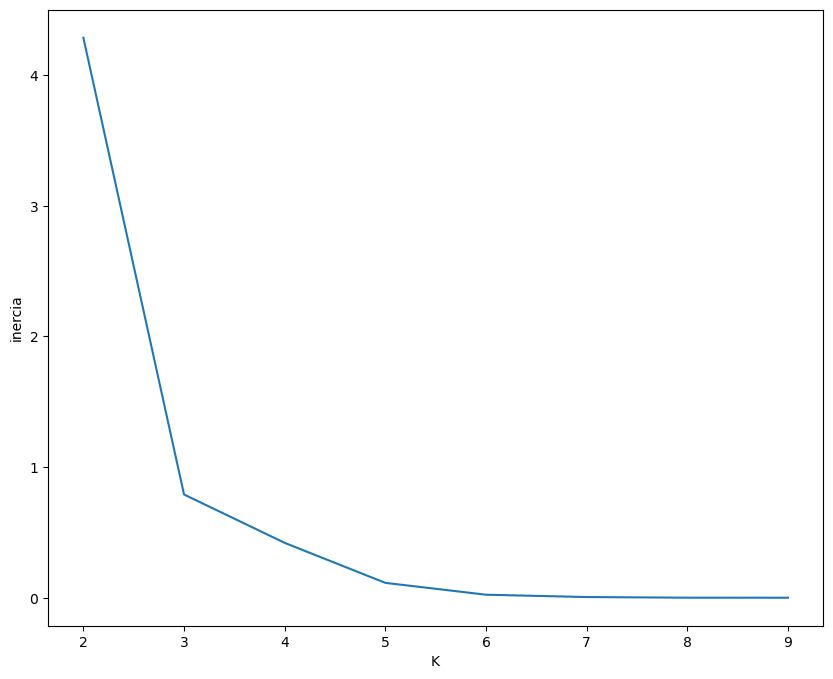

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans.fit(X_norm)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[-0.06351537,  0.12316617,  0.06718164,  0.21333572],
       [ 2.74214547,  2.64421425,  2.68409332,  2.54446685],
       [-0.51031987, -0.60274255, -0.57712765, -0.6368948 ]])

In [19]:
df["cluster"] = kmeans.labels_

In [20]:
df.head()

,TipoDelito,Comments,Likes,Retweets,Interactions,cluster
0,Accidente Vehicular,734.0,3293.000,11008.0,15437151.0,0
1,Agresión,1368.0,6824.000,22000.0,17420262.0,0
2,Extorsión,502.0,58.356,1901.0,1386000.0,2
3,Fraude,19.0,180.000,332.0,359555.0,2
4,Homicidio,731.0,5845.000,16153.0,33585276.0,0


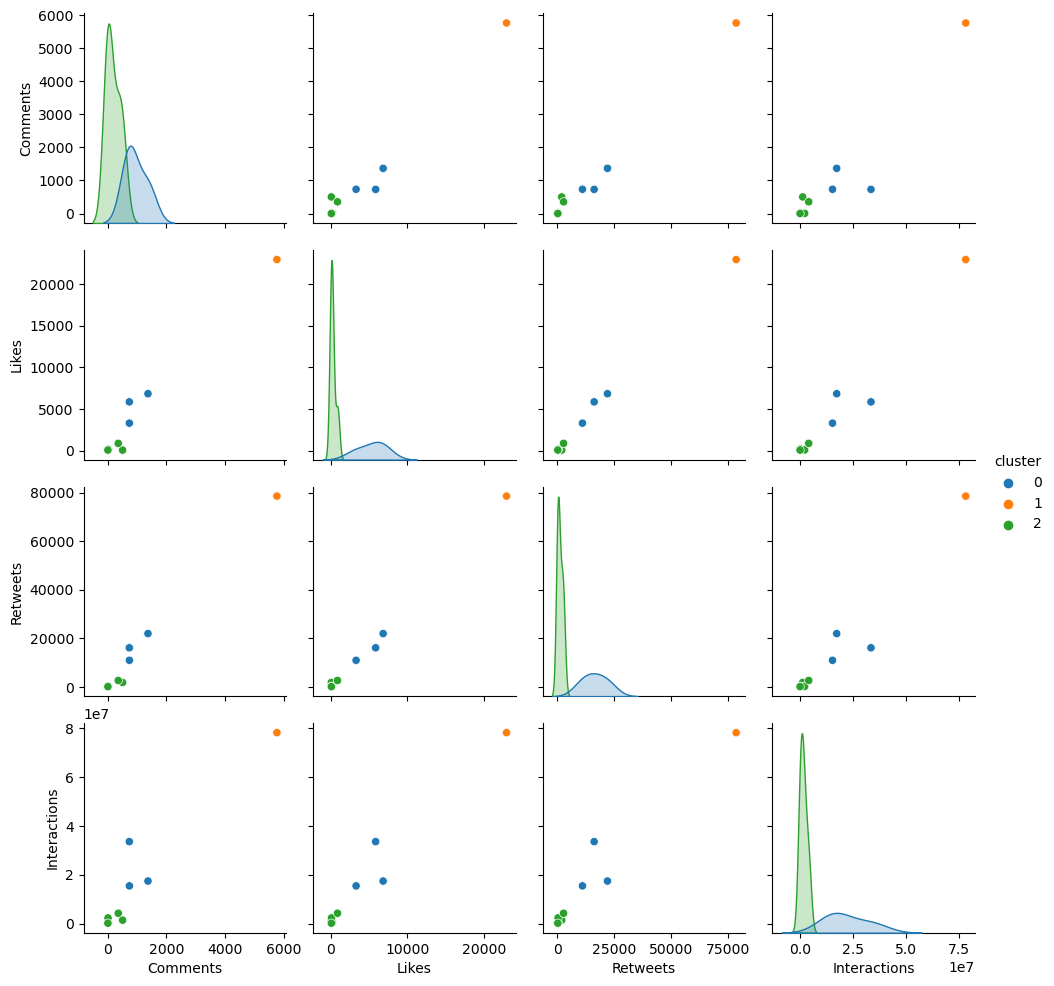

In [21]:
sns.pairplot(df,hue="cluster", palette="tab10")

In [22]:
df.loc[df["cluster"]==0]

,TipoDelito,Comments,Likes,Retweets,Interactions,cluster
0,Accidente Vehicular,734.0,3293.0,11008.0,15437151.0,0
1,Agresión,1368.0,6824.0,22000.0,17420262.0,0
4,Homicidio,731.0,5845.0,16153.0,33585276.0,0


In [23]:
df.loc[df["cluster"]==1]

,TipoDelito,Comments,Likes,Retweets,Interactions,cluster
6,Robo,5769.0,22932.004,78534.0,78268948.0,1


In [24]:
df.loc[df["cluster"]==2]

,TipoDelito,Comments,Likes,Retweets,Interactions,cluster
2,Extorsión,502.0,58.356,1901.0,1386000.0,2
3,Fraude,19.0,180.000,332.0,359555.0,2
5,Incendio,5.0,84.000,303.0,2299527.0,2
7,Secuestro,0.0,60.000,176.0,134000.0,2
8,Vandalismo,354.0,866.000,2717.0,4213323.0,2


<Axes: xlabel='cluster', ylabel='Comments'>

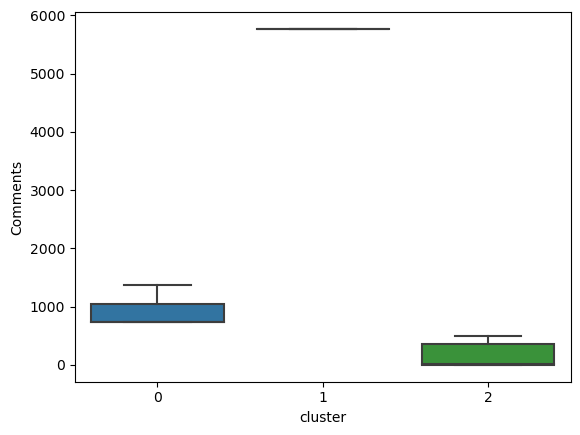

In [25]:
sns.boxplot(x="cluster", y="Comments", data=df)

<Axes: xlabel='cluster', ylabel='Likes'>

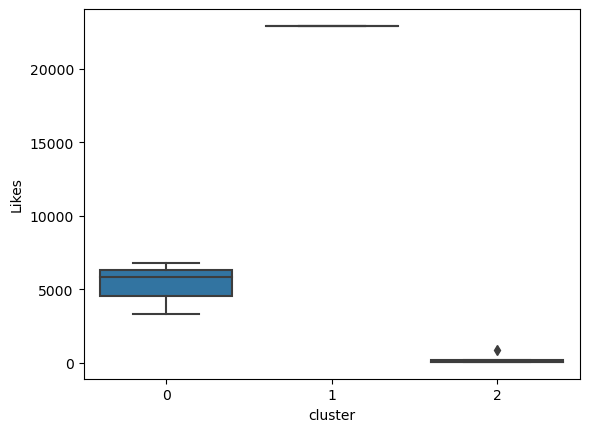

In [26]:
sns.boxplot(x="cluster", y="Likes", data=df)

<Axes: xlabel='cluster', ylabel='Retweets'>

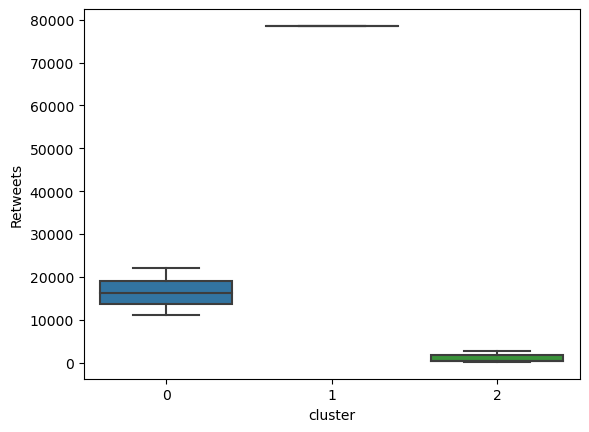

In [27]:
sns.boxplot(x="cluster", y="Retweets", data=df)

<Axes: xlabel='cluster', ylabel='Interactions'>

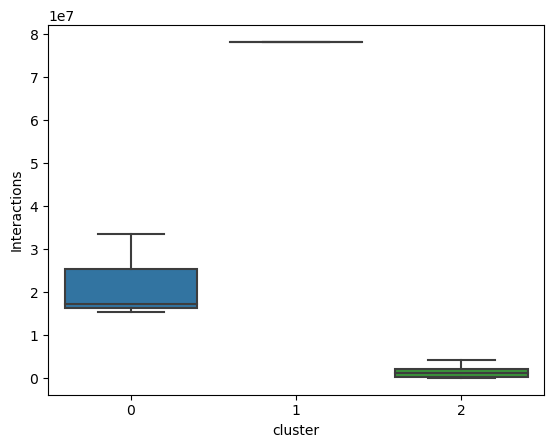

In [28]:
sns.boxplot(x="cluster", y="Interactions", data=df)